<a href="https://colab.research.google.com/github/matteo-orsi/MachineLearning/blob/main/notebooks/Lab-7.KNNGaussianNaiveBayesTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with KNN, Trees and Gaussian Naive Bayes

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Load and split the data from the Unsupervise Learning Dataset (Lab 5, Dry Bean Dataset):

In [26]:
FFILE = './Dry_Bean_Dataset.xlsx'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"

File already exists
File is readable


In [27]:
# Load the data
data = pd.read_excel('./Dry_Bean_Dataset.xlsx')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Divide features and label. Split the data in train and test set and **after that** normalize them:

In [ ]:
data = data.sample(frac = 1, random_state = 0).reset_index(drop = True)

In [28]:
# Transform the data to use it as numpy arrays.
X = data.iloc[:, :-1].values
y = data.iloc[:, 16].values

n, d = X.shape

In [29]:
# Creating an ordinal encoder for the ground truth labels
ordinal_encoder = preprocessing.OrdinalEncoder()

# Fitting the encoder to the label data
ordinal_encoder.fit(y.reshape(-1, 1))

# Transforming the original labels into encoded forms
y = ordinal_encoder.transform(y.reshape(-1, 1))

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.
# The 'stratify=y' parameter set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn import preprocessing

# Rescaling the features of the data to handle different units: subtracting the mean and dividing by the standard deviation
train_scaler = preprocessing.StandardScaler().fit(X_train)
test_scaler = preprocessing.StandardScaler().fit(X_test)

# Transforming the original data using the calculated mean and standard deviation
X_train_scaled = train_scaler.transform(X_train)
X_test_scaled = test_scaler.transform(X_test)

**Before feeding the data into the following algorithms, try to perform PCA, varying the number of PCs, and check what changes**

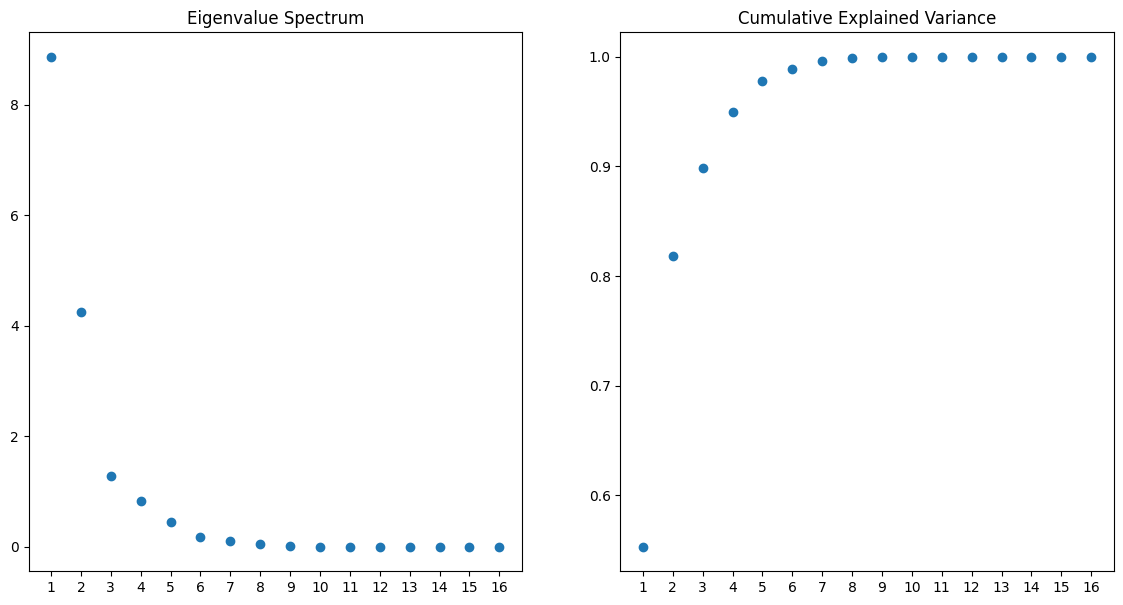

In [32]:
from sklearn.decomposition import PCA

# Performing Principal Component Analysis (PCA) using sklearn
pca = PCA()

# Fitting the PCA model to the scaled data
pca.fit(X_train_scaled)

# Transforming the original data to the principal components
projection = pca.transform(X_train_scaled)

# Calculating the cumulative explained variance ratio
cumulative_variance = np.zeros(d)
for i in range(d):
    cumulative_variance[i] = np.sum(pca.explained_variance_ratio_[:i+1])

# Extracting eigenvalues and component indices
eigenvalues = pca.explained_variance_
components = np.arange(d) + 1

# Creating subplots
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the Spectrum
ax1.set_title('Eigenvalue Spectrum')
ax1.scatter(components, eigenvalues)
ax1.set_xticks(components)

# Plotting the Cumulative Explained Variance
ax2.set_title('Cumulative Explained Variance')
ax2.scatter(components, cumulative_variance)
ax2.set_xticks(components)

# Displaying the plots
plt.show()

Explained Variance Threshold: 0.8, Number of Components: 2
Explained Variance Threshold: 0.85, Number of Components: 3
Explained Variance Threshold: 0.9, Number of Components: 4
Explained Variance Threshold: 0.95, Number of Components: 5
Explained Variance Threshold: 0.97, Number of Components: 5
Explained Variance Threshold: 0.99, Number of Components: 7
Explained Variance Threshold: 0.999, Number of Components: 8


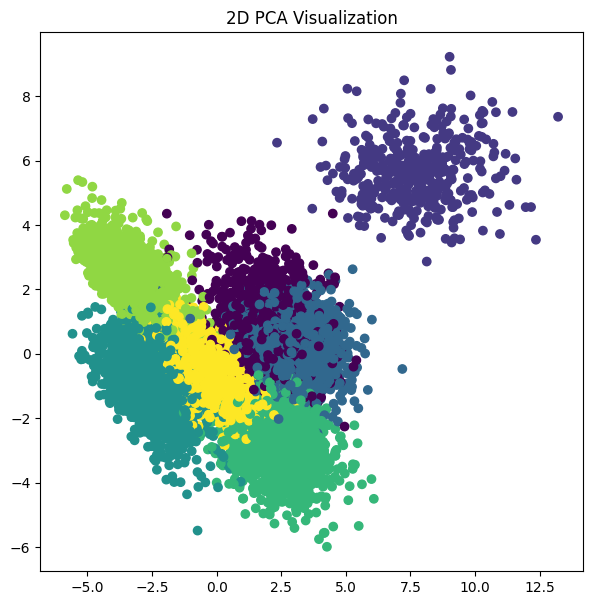

In [33]:
# Determine the number of components based on different explained variance thresholds.
for threshold in [0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999]:
    # Find the index where cumulative variance exceeds the threshold
    num_components = np.argmax(cumulative_variance - threshold > 0.) + 1

    # Print the threshold and the corresponding number of components
    print(f"Explained Variance Threshold: {threshold}, Number of Components: {num_components}")

# Plotting the 2D representation of the dataset using the first two Principal Components (PCs),
# with points colored by their ground truth labels.
fig, ax = plt.subplots(figsize=(7, 7))

# Scatter plot of the dataset in 2D space using the first two Principal Components
ax.scatter(projection[:, 0], projection[:, 1], c = y_train)

# Setting the title of the plot
ax.set_title('2D PCA Visualization')

# Displaying the plot
plt.show()

## K-Nearest Neighbors Classification

Implement the KNN algorithm for classification.

In [34]:
from scipy.spatial.distance import cdist

In [35]:
def knn(X_train, y_train, X_test, k):
   """
   Parameters
   ----------
   X_train : array of dim n x d
       Matrix containing the train dataset.
   y_train : array of dim n
       Vector representing the ground truth label of each data point
   X_test : array of dim n x d
       Matrix containing the test dataset.
   k : int
       Number of neighbors to consider.
   """
   distance_matrix = cdist(X_test, X_train)
   indices = np.argsort(distance_matrix, axis=1)[:, :k]
   neighbors_labels = y_train[indices]


## Decision Trees with Numerical Features

Modify the implementation of decision trees to account for numerical input features.

## Gaussian Naive Bayes
Modufy the implemntation of naive Bayes to accout for numerical input features. The likelihood of each class ($p(data|class)$) is assumed to be a Gaussian $\frac{1}{\sqrt(\sigma^2 2 \pi)} \exp (\frac{1}{2} \frac{(x-\mu)}{\sigma^2})$, where $\mu, \sigma^2$ are the mean and the variance for each class;